In [1]:
# Basic Import
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Modelling
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

# Import the Excel file data as Pandas Datframe

In [2]:
# Load data from the specified sheet "3.4.2 (incl CCL)" and preview the first few rows
df = pd.read_excel("/Users/justicesmacboookair/Documents/Data-science/SLR-ENP/research/data/temple_data_transformed.xlsx")

#### Show Top 5 Records

In [3]:
df.head()

,Year,Quarter,Electricity: Very Small (Pence per kWh),Electricity: Small (Pence per kWh),Electricity: Small/Medium (Pence per kWh),Electricity: Medium (Pence per kWh),Electricity: Large (Pence per kWh),Electricity: Very Large (Pence per kWh),Electricity: Extra Large (Pence per kWh),Electricity: Average (Pence per kWh),Avg_Electricity_Price
0,2007,1,9.531999,8.302909,8.048118,7.257151,6.771136,6.820582,6.438687,7.637417,7.595798
1,2007,2,9.845438,7.647641,6.913110,6.522139,5.928171,5.774705,4.859447,6.748888,6.784379
2,2007,3,9.923440,8.335395,7.509659,6.525570,6.087500,5.784247,4.306788,6.880579,6.924657
3,2007,4,9.933320,8.437592,7.453594,6.574385,6.184248,5.956329,5.476230,7.117072,7.145100
4,2008,1,10.020676,8.604631,7.549362,6.615001,6.437835,6.608856,5.766387,7.363354,7.371821


### Preparing X and Y Variables

In [4]:
X = df.drop("Avg_Electricity_Price", axis =1)

In [5]:
X.head()

,Year,Quarter,Electricity: Very Small (Pence per kWh),Electricity: Small (Pence per kWh),Electricity: Small/Medium (Pence per kWh),Electricity: Medium (Pence per kWh),Electricity: Large (Pence per kWh),Electricity: Very Large (Pence per kWh),Electricity: Extra Large (Pence per kWh),Electricity: Average (Pence per kWh)
0,2007,1,9.531999,8.302909,8.048118,7.257151,6.771136,6.820582,6.438687,7.637417
1,2007,2,9.845438,7.647641,6.913110,6.522139,5.928171,5.774705,4.859447,6.748888
2,2007,3,9.923440,8.335395,7.509659,6.525570,6.087500,5.784247,4.306788,6.880579
3,2007,4,9.933320,8.437592,7.453594,6.574385,6.184248,5.956329,5.476230,7.117072
4,2008,1,10.020676,8.604631,7.549362,6.615001,6.437835,6.608856,5.766387,7.363354


In [6]:
y = df['Avg_Electricity_Price']

In [7]:
y.head()

0    7.595798
1    6.784379
2    6.924657
3    7.145100
4    7.371821
Name: Avg_Electricity_Price, dtype: float64

In [8]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(70, 10)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((56, 10), (14, 10))

### Creating an evaluate function to give all metrics after model training

In [12]:
# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)  # MSE (mean squared error)
    rmse = np.sqrt(mse)  # Calculate RMSE manually
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Models dictionary
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge()
}

# Lists to store model names and R² values
model_list = []
r2_list = []

# Loop through the models to train and evaluate
for i in range(len(models)):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions for both training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model on training and test sets
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Print the model performance
    print(model_name)
    model_list.append(model_name)
    
    print("Model performance for training set:")
    print(f". Root mean squared error: {model_train_rmse:.4f}")
    print(f". Mean absolute error: {model_train_mae:.4f}")
    print(f". R² score: {model_train_r2:.4f}")
    
    print("----------------------")
    
    print("Model performance for test set:")
    print(f". Root mean squared error: {model_test_rmse:.4f}")
    print(f". Mean absolute error: {model_test_mae:.4f}")
    print(f". R² score: {model_test_r2:.4f}")
    
    print("="*35)
    print("\n")

LinearRegression
Model performance for training set:
. Root mean squared error: 0.0000
. Mean absolute error: 0.0000
. R² score: 1.0000
----------------------
Model performance for test set:
. Root mean squared error: 0.0000
. Mean absolute error: 0.0000
. R² score: 1.0000


Lasso
Model performance for training set:
. Root mean squared error: 1.0015
. Mean absolute error: 0.7280
. R² score: 0.9710
----------------------
Model performance for test set:
. Root mean squared error: 1.0336
. Mean absolute error: 0.7676
. R² score: 0.9631


Ridge
Model performance for training set:
. Root mean squared error: 0.0281
. Mean absolute error: 0.0211
. R² score: 1.0000
----------------------
Model performance for test set:
. Root mean squared error: 0.0237
. Mean absolute error: 0.0196
. R² score: 1.0000




## Results {Work on}

In [13]:
# Check if the lists have values
print("Model List:", model_list)
print("R2 List:", r2_list)
# Create a DataFrame to display results
results_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model name', 'R2_score'])

# Check the DataFrame structure
print(results_df)

# Sort and display


Model List: ['LinearRegression', 'Lasso', 'Ridge']
R2 List: []
Empty DataFrame
Columns: [Model name, R2_score]
Index: []


In [14]:
# Create a DataFrame to display results
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model name', 'R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model name,R2_score


## Linear Regression

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("The accuracy of the model is %.2f" %score)

The accuracy of the model is 100.00


## Plot y_pred and y_test

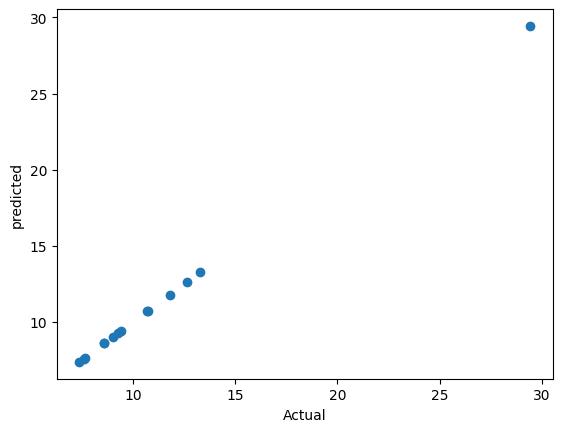

In [16]:
plt.scatter(y_test, y_pred);
plt.xlabel("Actual");
plt.ylabel("predicted");

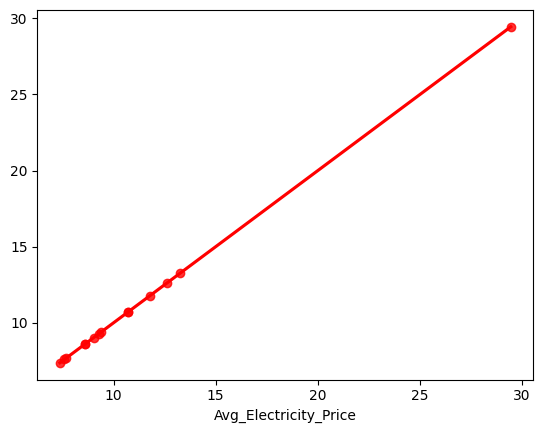

In [17]:
sns.regplot(x=y_test, y=y_pred,ci=None, color="red");

## Difference between actual and predicted values

In [18]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
22,9.406904,9.406904,1.776357e-15
0,7.595798,7.595798,2.664535e-15
49,12.614888,12.614888,-3.552714e-15
4,7.371821,7.371821,1.776357e-15
54,13.273997,13.273997,1.776357e-15
18,8.597812,8.597812,0.000000e+00
10,9.017435,9.017435,1.776357e-15
33,10.692553,10.692553,3.552714e-15
45,11.781792,11.781792,3.552714e-15
12,8.597877,8.597877,1.776357e-15
